# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Reacher_Windows_x86_64/Reacher.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
import sys
sys.path.append("code")

from collections import deque
from unityagents import UnityEnvironment
import numpy as np
import random as random
import torch
from DDPGAgent import DDPGAgent

import matplotlib.pyplot as plt

In [6]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [7]:
SEED = 0

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED);

In [8]:
agents = [DDPGAgent(state_size, action_size, random_seed=SEED)]
scores_episode = []

In [9]:
def ddpg(n_episodes=300, max_t=1000):
    scores_window = deque(maxlen=100)
    scores = np.zeros(num_agents)
        
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        
        for agent in agents:
            agent.reset()
            
        scores = np.zeros(num_agents)
            
        for t in range(max_t):
            actions = [agents[i].act(states[i]) for i in range(num_agents)]
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            
            for i in range(num_agents):
                agents[i].step(t,states[i], actions[i], rewards[i], next_states[i], dones[i]) 
 
            states = next_states
            scores += rewards
            if t % 20:
                print('\rTimestep {}\tScore: {:.2f}\tmin: {:.2f}\tmax: {:.2f}'
                      .format(t, np.mean(scores), np.min(scores), np.max(scores)), end="") 
            if np.any(dones):
                break 
        score = np.mean(scores)
        scores_window.append(score)
        scores_episode.append(score)
        
        torch.save(agents[0].actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agents[0].critic_local.state_dict(), 'checkpoint_critic.pth')
        
        print('\rEpisode {}\tScore: {:.2f}\tAverage Score: {:.2f}\t\t\t'.format(i_episode, score, np.mean(scores_window)), end="\n")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window) >= 30.0 and len(scores_window) >= 100:
            print('\nEnvironment solved!')
            break
            
    return scores_episode

In [10]:
_ = ddpg(2000);

Episode 1	Score: 0.00	Average Score: 0.00			
Episode 2	Score: 0.92	Average Score: 0.46			
Episode 3	Score: 1.01	Average Score: 0.64			
Episode 4	Score: 0.73	Average Score: 0.66			
Episode 5	Score: 0.00	Average Score: 0.53			
Episode 6	Score: 0.94	Average Score: 0.60			
Episode 7	Score: 0.30	Average Score: 0.56			
Episode 8	Score: 1.13	Average Score: 0.63			
Episode 9	Score: 0.01	Average Score: 0.56			
Episode 10	Score: 0.84	Average Score: 0.59			
Episode 11	Score: 0.08	Average Score: 0.54			
Episode 12	Score: 0.23	Average Score: 0.52			
Episode 13	Score: 0.00	Average Score: 0.48			
Episode 14	Score: 0.00	Average Score: 0.44			
Episode 15	Score: 0.00	Average Score: 0.41			
Episode 16	Score: 0.54	Average Score: 0.42			
Episode 17	Score: 0.00	Average Score: 0.40			
Episode 18	Score: 1.29	Average Score: 0.45			
Episode 19	Score: 0.75	Average Score: 0.46			
Episode 20	Score: 0.20	Average Score: 0.45			
Episode 21	Score: 0.28	Average Score: 0.44			
Episode 22	Score: 0.69	Average Score: 0.45	

Episode 176	Score: 4.28	Average Score: 4.13			
Episode 177	Score: 4.44	Average Score: 4.16			
Episode 178	Score: 4.50	Average Score: 4.18			
Episode 179	Score: 6.27	Average Score: 4.21			
Episode 180	Score: 5.40	Average Score: 4.24			
Episode 181	Score: 5.00	Average Score: 4.28			
Episode 182	Score: 5.02	Average Score: 4.30			
Episode 183	Score: 5.28	Average Score: 4.33			
Episode 184	Score: 6.00	Average Score: 4.36			
Episode 185	Score: 10.58	Average Score: 4.44			
Episode 186	Score: 5.27	Average Score: 4.46			
Episode 187	Score: 4.08	Average Score: 4.48			
Episode 188	Score: 6.23	Average Score: 4.51			
Episode 189	Score: 7.03	Average Score: 4.57			
Episode 190	Score: 3.30	Average Score: 4.56			
Episode 191	Score: 5.92	Average Score: 4.48			
Episode 192	Score: 2.17	Average Score: 4.46			
Episode 193	Score: 6.57	Average Score: 4.50			
Episode 194	Score: 10.19	Average Score: 4.58			
Episode 195	Score: 8.02	Average Score: 4.63			
Episode 196	Score: 6.16	Average Score: 4.65			
Episode 197

Episode 348	Score: 8.45	Average Score: 8.63			
Episode 349	Score: 9.31	Average Score: 8.65			
Episode 350	Score: 9.48	Average Score: 8.58			
Episode 351	Score: 10.38	Average Score: 8.62			
Episode 352	Score: 7.38	Average Score: 8.63			
Episode 353	Score: 8.90	Average Score: 8.66			
Episode 354	Score: 4.89	Average Score: 8.60			
Episode 355	Score: 9.53	Average Score: 8.69			
Episode 356	Score: 4.86	Average Score: 8.70			
Episode 357	Score: 11.58	Average Score: 8.76			
Episode 358	Score: 7.45	Average Score: 8.76			
Episode 359	Score: 7.80	Average Score: 8.76			
Episode 360	Score: 9.76	Average Score: 8.79			
Episode 361	Score: 10.38	Average Score: 8.77			
Episode 362	Score: 8.46	Average Score: 8.81			
Episode 363	Score: 11.90	Average Score: 8.87			
Episode 364	Score: 12.76	Average Score: 8.99			
Episode 365	Score: 7.82	Average Score: 9.00			
Episode 366	Score: 10.54	Average Score: 9.04			
Episode 367	Score: 9.87	Average Score: 9.07			
Episode 368	Score: 9.86	Average Score: 9.09			
Episode

Episode 516	Score: 13.47	Average Score: 13.24			
Episode 517	Score: 14.69	Average Score: 13.25			
Episode 518	Score: 9.86	Average Score: 13.07			
Episode 519	Score: 10.98	Average Score: 13.02			
Episode 520	Score: 13.27	Average Score: 12.86			
Episode 521	Score: 10.69	Average Score: 12.84			
Episode 522	Score: 15.54	Average Score: 12.87			
Episode 523	Score: 10.07	Average Score: 12.82			
Episode 524	Score: 13.73	Average Score: 12.81			
Episode 525	Score: 12.65	Average Score: 12.84			
Episode 526	Score: 14.60	Average Score: 12.86			
Episode 527	Score: 9.35	Average Score: 12.84			
Episode 528	Score: 11.43	Average Score: 12.88			
Episode 529	Score: 8.69	Average Score: 12.85			
Episode 530	Score: 9.57	Average Score: 12.81			
Episode 531	Score: 12.39	Average Score: 12.83			
Episode 532	Score: 14.15	Average Score: 12.88			
Episode 533	Score: 13.18	Average Score: 12.87			
Episode 534	Score: 8.76	Average Score: 12.80			
Episode 535	Score: 5.85	Average Score: 12.74			
Episode 536	Score: 12.48	A

Episode 683	Score: 18.74	Average Score: 12.88			
Episode 684	Score: 10.37	Average Score: 12.83			
Episode 685	Score: 10.20	Average Score: 12.80			
Episode 686	Score: 13.69	Average Score: 12.82			
Episode 687	Score: 15.94	Average Score: 12.83			
Episode 688	Score: 11.89	Average Score: 12.86			
Episode 689	Score: 11.45	Average Score: 12.90			
Episode 690	Score: 14.06	Average Score: 12.89			
Episode 691	Score: 15.39	Average Score: 12.95			
Episode 692	Score: 11.75	Average Score: 12.80			
Episode 693	Score: 12.73	Average Score: 12.85			
Episode 694	Score: 11.77	Average Score: 12.89			
Episode 695	Score: 21.01	Average Score: 13.00			
Episode 696	Score: 10.45	Average Score: 12.98			
Episode 697	Score: 10.74	Average Score: 12.96			
Episode 698	Score: 12.46	Average Score: 12.98			
Episode 699	Score: 11.68	Average Score: 12.98			
Episode 700	Score: 12.36	Average Score: 13.00			
Episode 700	Average Score: 13.00
Episode 701	Score: 11.61	Average Score: 13.00			
Episode 702	Score: 8.52	Average Scor

Episode 849	Score: 17.32	Average Score: 14.03			
Episode 850	Score: 15.95	Average Score: 14.06			
Episode 851	Score: 13.48	Average Score: 14.08			
Episode 852	Score: 12.71	Average Score: 14.07			
Episode 853	Score: 13.48	Average Score: 14.06			
Episode 854	Score: 13.45	Average Score: 14.07			
Episode 855	Score: 16.00	Average Score: 14.10			
Episode 856	Score: 13.07	Average Score: 14.07			
Episode 857	Score: 16.82	Average Score: 14.05			
Episode 858	Score: 22.43	Average Score: 14.13			
Episode 859	Score: 10.48	Average Score: 14.10			
Episode 860	Score: 14.38	Average Score: 14.09			
Episode 861	Score: 13.61	Average Score: 14.07			
Episode 862	Score: 15.66	Average Score: 14.11			
Episode 863	Score: 13.22	Average Score: 14.12			
Episode 864	Score: 12.14	Average Score: 14.13			
Episode 865	Score: 15.02	Average Score: 14.13			
Episode 866	Score: 14.50	Average Score: 14.15			
Episode 867	Score: 12.11	Average Score: 14.12			
Episode 868	Score: 14.69	Average Score: 14.15			
Episode 869	Score: 1

Episode 1014	Score: 16.37	Average Score: 15.82			
Episode 1015	Score: 19.18	Average Score: 15.83			
Episode 1016	Score: 20.24	Average Score: 15.90			
Episode 1017	Score: 20.91	Average Score: 15.94			
Episode 1018	Score: 16.37	Average Score: 15.95			
Episode 1019	Score: 14.45	Average Score: 15.96			
Episode 1020	Score: 18.01	Average Score: 15.96			
Episode 1021	Score: 15.81	Average Score: 15.98			
Episode 1022	Score: 19.95	Average Score: 16.02			
Episode 1023	Score: 15.48	Average Score: 16.04			
Episode 1024	Score: 20.36	Average Score: 16.08			
Episode 1025	Score: 13.43	Average Score: 16.05			
Episode 1026	Score: 9.70	Average Score: 15.98			
Episode 1027	Score: 20.74	Average Score: 15.99			
Episode 1028	Score: 16.24	Average Score: 16.01			
Episode 1029	Score: 17.39	Average Score: 16.07			
Episode 1030	Score: 14.20	Average Score: 16.08			
Episode 1031	Score: 14.85	Average Score: 16.05			
Episode 1032	Score: 13.36	Average Score: 16.06			
Episode 1033	Score: 13.88	Average Score: 15.97			
E

Episode 1177	Score: 16.16	Average Score: 17.02			
Episode 1178	Score: 20.45	Average Score: 17.03			
Episode 1179	Score: 20.64	Average Score: 17.09			
Episode 1180	Score: 16.66	Average Score: 17.11			
Episode 1181	Score: 19.57	Average Score: 17.13			
Episode 1182	Score: 15.29	Average Score: 17.14			
Episode 1183	Score: 13.52	Average Score: 17.09			
Episode 1184	Score: 10.26	Average Score: 17.04			
Episode 1185	Score: 17.55	Average Score: 17.06			
Episode 1186	Score: 17.36	Average Score: 17.05			
Episode 1187	Score: 20.54	Average Score: 17.06			
Episode 1188	Score: 16.10	Average Score: 17.09			
Episode 1189	Score: 18.78	Average Score: 17.09			
Episode 1190	Score: 22.06	Average Score: 17.17			
Episode 1191	Score: 14.70	Average Score: 17.17			
Episode 1192	Score: 17.28	Average Score: 17.21			
Episode 1193	Score: 16.14	Average Score: 17.18			
Episode 1194	Score: 15.95	Average Score: 17.17			
Episode 1195	Score: 24.47	Average Score: 17.26			
Episode 1196	Score: 17.56	Average Score: 17.28			


Episode 1339	Score: 18.87	Average Score: 19.12			
Episode 1340	Score: 25.31	Average Score: 19.22			
Episode 1341	Score: 26.53	Average Score: 19.34			
Episode 1342	Score: 22.44	Average Score: 19.36			
Episode 1343	Score: 14.76	Average Score: 19.36			
Episode 1344	Score: 20.88	Average Score: 19.42			
Episode 1345	Score: 19.82	Average Score: 19.39			
Episode 1346	Score: 15.68	Average Score: 19.40			
Episode 1347	Score: 24.67	Average Score: 19.53			
Episode 1348	Score: 22.36	Average Score: 19.58			
Episode 1349	Score: 25.57	Average Score: 19.61			
Episode 1350	Score: 21.34	Average Score: 19.64			
Episode 1351	Score: 27.70	Average Score: 19.75			
Episode 1352	Score: 24.80	Average Score: 19.87			
Episode 1353	Score: 22.63	Average Score: 19.92			
Episode 1354	Score: 27.03	Average Score: 19.87			
Episode 1355	Score: 18.05	Average Score: 19.84			
Episode 1356	Score: 20.10	Average Score: 19.84			
Episode 1357	Score: 25.78	Average Score: 19.90			
Episode 1358	Score: 23.90	Average Score: 19.93			


Episode 1501	Score: 17.78	Average Score: 19.29			
Episode 1502	Score: 21.06	Average Score: 19.28			
Episode 1503	Score: 21.84	Average Score: 19.27			
Episode 1504	Score: 14.95	Average Score: 19.17			
Episode 1505	Score: 26.14	Average Score: 19.23			
Episode 1506	Score: 24.46	Average Score: 19.25			
Episode 1507	Score: 14.56	Average Score: 19.24			
Episode 1508	Score: 16.52	Average Score: 19.21			
Episode 1509	Score: 17.81	Average Score: 19.23			
Episode 1510	Score: 16.92	Average Score: 19.23			
Episode 1511	Score: 18.44	Average Score: 19.23			
Episode 1512	Score: 23.42	Average Score: 19.30			
Episode 1513	Score: 17.44	Average Score: 19.45			
Episode 1514	Score: 24.32	Average Score: 19.54			
Episode 1515	Score: 14.99	Average Score: 19.50			
Episode 1516	Score: 11.74	Average Score: 19.45			
Episode 1517	Score: 24.88	Average Score: 19.46			
Episode 1518	Score: 22.46	Average Score: 19.41			
Episode 1519	Score: 25.76	Average Score: 19.46			
Episode 1520	Score: 23.95	Average Score: 19.39			


Episode 1664	Score: 20.02	Average Score: 24.46			
Episode 1665	Score: 23.99	Average Score: 24.54			
Episode 1666	Score: 23.83	Average Score: 24.66			
Episode 1667	Score: 23.64	Average Score: 24.68			
Episode 1668	Score: 23.83	Average Score: 24.64			
Episode 1669	Score: 19.63	Average Score: 24.57			
Episode 1670	Score: 24.92	Average Score: 24.57			
Episode 1671	Score: 29.65	Average Score: 24.66			
Episode 1672	Score: 20.03	Average Score: 24.58			
Episode 1673	Score: 25.43	Average Score: 24.57			
Episode 1674	Score: 28.94	Average Score: 24.69			
Episode 1675	Score: 19.34	Average Score: 24.72			
Episode 1676	Score: 26.79	Average Score: 24.75			
Episode 1677	Score: 24.35	Average Score: 24.76			
Episode 1678	Score: 27.14	Average Score: 24.79			
Episode 1679	Score: 25.34	Average Score: 24.78			
Episode 1680	Score: 24.93	Average Score: 24.83			
Episode 1681	Score: 30.48	Average Score: 24.91			
Episode 1682	Score: 26.46	Average Score: 24.90			
Episode 1683	Score: 27.24	Average Score: 24.91			


Episode 1826	Score: 33.29	Average Score: 29.55			
Episode 1827	Score: 34.20	Average Score: 29.61			
Episode 1828	Score: 29.10	Average Score: 29.63			
Episode 1829	Score: 31.73	Average Score: 29.63			
Episode 1830	Score: 28.49	Average Score: 29.60			
Episode 1831	Score: 33.11	Average Score: 29.71			
Episode 1832	Score: 28.42	Average Score: 29.68			
Episode 1833	Score: 32.04	Average Score: 29.70			
Episode 1834	Score: 29.06	Average Score: 29.71			
Episode 1835	Score: 30.82	Average Score: 29.69			
Episode 1836	Score: 31.96	Average Score: 29.73			
Episode 1837	Score: 25.99	Average Score: 29.70			
Episode 1838	Score: 30.18	Average Score: 29.72			
Episode 1839	Score: 34.32	Average Score: 29.78			
Episode 1840	Score: 32.00	Average Score: 29.85			
Episode 1841	Score: 33.16	Average Score: 29.87			
Episode 1842	Score: 29.81	Average Score: 29.92			
Episode 1843	Score: 28.10	Average Score: 29.90			
Episode 1844	Score: 31.15	Average Score: 30.01			

Environment solved!


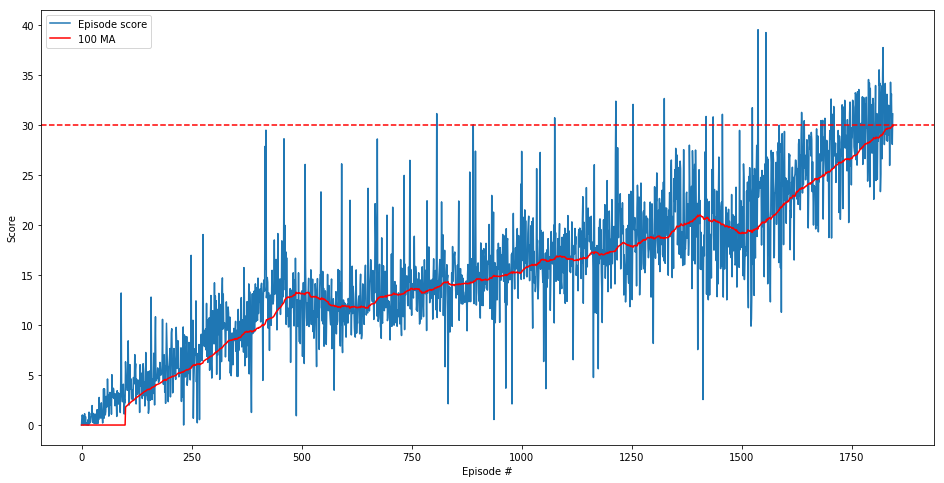

In [14]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

ma = 100
avg = moving_average(scores_episode, ma)
avg = np.concatenate((np.zeros(ma), avg))

# plot the scores
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_episode)), scores_episode, label='Episode score')
plt.plot(np.arange(len(avg)), avg, c='r', label='{} MA'.format(ma))
plt.axhline(y=30, color='r', linestyle='dashed')

plt.legend()
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [ ]:
env.close()